# About
ChatGPT translation of `bbm_tide_specs.m`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
# %% BBM version of tidal generation spectra evolution
# load data
data = loadmat("../bbm_tide2crittry.mat")

# extract variables (adjust names if needed)
B1s = data["B1s"]
B2s = data["B2s"]
x = data["x"].squeeze()

# set up some useful parameters
L = 60
M, N = B1s.shape

# FFT in space (along axis 0, MATLAB dimension 1)
B1sf = np.fft.fft(B1s, axis=0)

# spectrum
myspecs = B1sf * np.conj(B1sf)
myspecs = np.real(myspecs)  # necessary for pcolormesh

# minimum k and k values to use
dk = 2 * np.pi / L
numks = 1000
myks = np.arange(numks + 1) * dk

In [7]:
myspecs

array([[1.43816613e-24, 5.75169408e-24, 1.29379705e-23, ...,
        2.06356120e-18, 2.06700978e-18, 2.07045262e-18],
       [6.47933145e-03, 2.59206311e-02, 5.83337659e-02, ...,
        2.01803961e+02, 1.97878561e+02, 1.93908044e+02],
       [1.70194903e-02, 6.80812439e-02, 1.53195993e-01, ...,
        6.40120759e+01, 6.75595629e+01, 7.09848657e+01],
       ...,
       [1.77721504e-02, 7.10818089e-02, 1.59911276e-01, ...,
        1.31867707e+01, 1.13844178e+01, 9.85598790e+00],
       [1.70194903e-02, 6.80812439e-02, 1.53195993e-01, ...,
        6.40120759e+01, 6.75595629e+01, 7.09848657e+01],
       [6.47933145e-03, 2.59206311e-02, 5.83337659e-02, ...,
        2.01803961e+02, 1.97878561e+02, 1.93908044e+02]],
      shape=(2048, 1200))

(np.float64(0.0), np.float64(20.0), np.float64(0.0), np.float64(400.0))

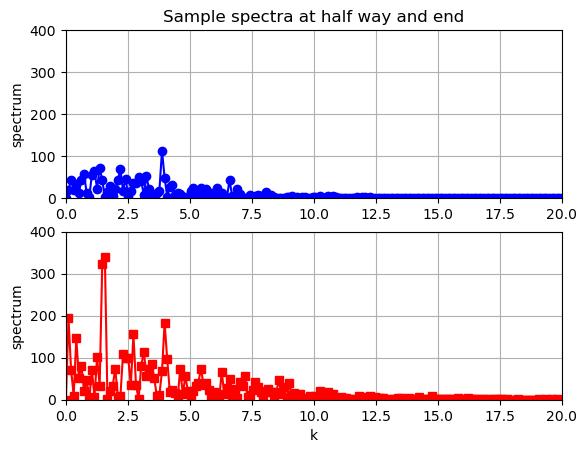

In [11]:
# -----------------------
# Spectra plots
# -----------------------
plt.figure(6)
plt.clf()

plt.subplot(2, 1, 1)
plt.plot(myks, myspecs[:numks + 1, 599], 'bo-')  # MATLAB 600 → Python 599
plt.grid(True)
plt.ylabel("spectrum")
plt.axis([0, 20, 0, 400])
plt.title("Sample spectra at half way and end")

plt.subplot(2, 1, 2)
plt.plot(myks, myspecs[:numks + 1, 1199], 'rs-')  # MATLAB 1200 → Python 1199
plt.grid(True)
plt.xlabel("k")
plt.ylabel("spectrum")
plt.axis([0, 20, 0, 400])

/tmp/ipykernel_9288/2217549897.py:20: RuntimeWarning: divide by zero encountered in log10
  np.log10(myspecs[:numks, :-1].T), shading="flat",


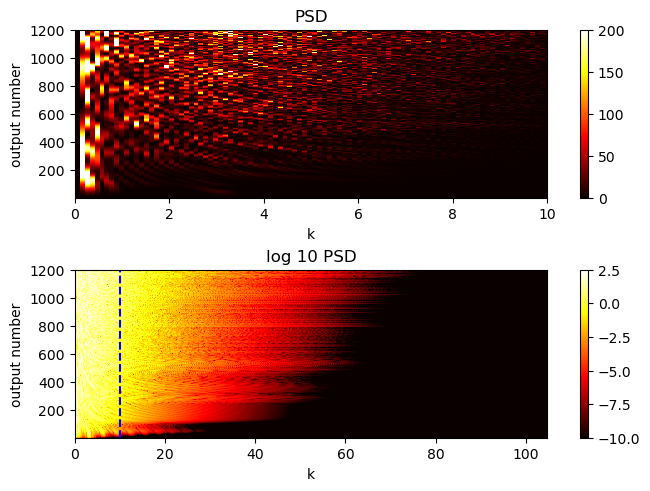

In [12]:
# -----------------------
# Hovmoeller (space–time) plot
# -----------------------
plt.figure(7, layout='constrained')
plt.clf()

plt.subplot(2, 1, 1)
plt.pcolormesh(myks, np.arange(1, N + 1), 
               myspecs[:numks, :-1].T, shading="flat",
              cmap='hot')
plt.colorbar()
plt.ylabel("output number")
plt.xlabel("k")
plt.title("PSD")
plt.axis([0, 10, 1, 1200])
plt.clim(0, 200)

plt.subplot(2, 1, 2)
plt.pcolormesh(myks, np.arange(1, N + 1),
               np.log10(myspecs[:numks, :-1].T), shading="flat",
               cmap='hot')
plt.colormap = "hot"
plt.colorbar()
plt.clim(-10, 2.5)
plt.ylabel("output number")
plt.xlabel("k")
plt.title("log 10 PSD")
plt.plot([10, 10], [1, 1200], 'b--')

Text(0.5, 1.0, 'Comparison with sinusoids')

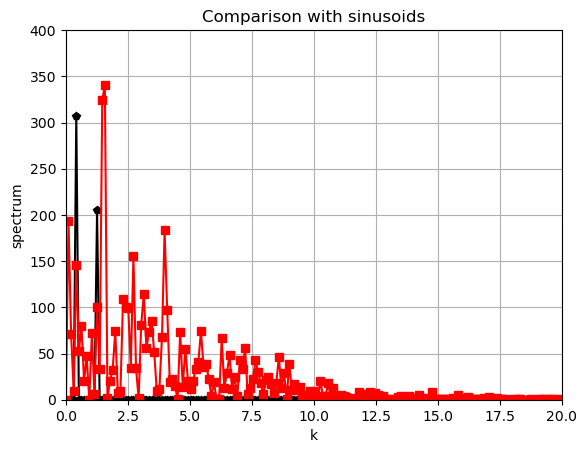

In [13]:
# -----------------------
# Comparison with sinusoids
# -----------------------
plt.figure(8)
plt.clf()

myf = 0.3 * np.sin(2 * np.pi * x / 15) + 0.2 * np.cos(2 * np.pi * x / 5)
sampspec = np.abs(np.fft.fft(myf))

plt.plot(myks, sampspec[:numks + 1], 'kp-',
         myks, myspecs[:numks + 1, 1199], 'rs-')
plt.grid(True)
plt.xlabel("k")
plt.ylabel("spectrum")
plt.axis([0, 20, 0, 400])
plt.title('Comparison with sinusoids')
plt.show()

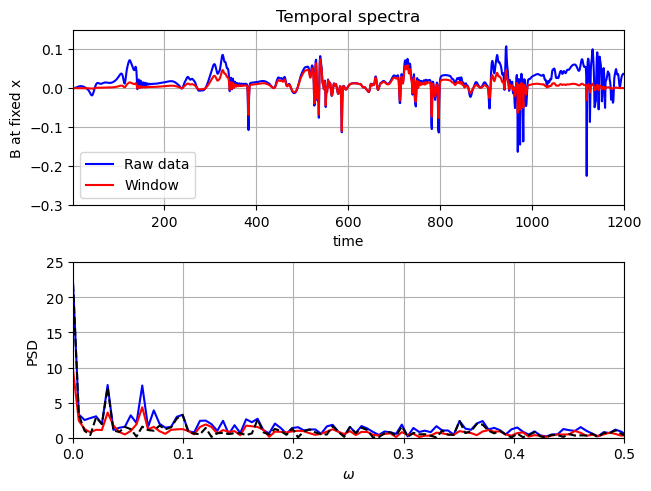

In [16]:
# -----------------------
# Temporal spectra
# -----------------------
plt.figure(9, layout='constrained')
plt.clf()

# extract data
Btime = B2s[919, :]  # MATLAB 920 → Python 919

# window function
mywin = np.concatenate((np.arange(600), np.arange(600, 0, -1))) / 600
Btimewin = Btime * mywin

plt.subplot(2, 1, 1)
plt.plot(np.arange(1, 1201), Btime, 'b',
         np.arange(1, 1201), Btimewin, 'r')
plt.legend(['Raw data', 'Window'])
plt.ylabel("B at fixed x")
plt.xlabel("time")
plt.axis([1, 1200, -0.3, 0.15])
plt.grid(True)
plt.title('Temporal spectra')

plt.subplot(2, 1, 2)
# frequencies
dom = 2 * np.pi / 1200
numoms = 100
oms = np.arange(numoms + 1) * dom

# even extension
Btimeext = np.concatenate((Btime, Btime[::-1]))

spt = np.abs(np.fft.fft(Btime))
spwint = np.abs(np.fft.fft(Btimewin))
omsext = np.arange(2 * numoms + 1) * 0.5 * dom
spext = np.abs(np.fft.fft(Btimeext))

plt.plot(oms, spt[:numoms + 1], 'b',
         oms, spwint[:numoms + 1], 'r',
         omsext[::2], spext[::2][:numoms + 1] / 2, 'k--')

plt.ylabel("PSD")
plt.xlabel(r"$\omega$")
plt.axis([0, 0.5, 0, 25])
plt.grid(True)

plt.show()